In [1]:
import pandas as pd
import plotly.express as px

In [2]:
data = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908_t0_2023.csv', encoding='latin1')
data.head()

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,9/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,9/7/1909,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,7/12/1912,6:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,8/6/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,9/9/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   4998 non-null   object 
 1   Time                   3486 non-null   object 
 2   Location               4994 non-null   object 
 3   Operator               4988 non-null   object 
 4   Flight #               1329 non-null   object 
 5   Route                  4221 non-null   object 
 6   AC Type                4983 non-null   object 
 7   Registration           4724 non-null   object 
 8   cn/ln                  4330 non-null   object 
 9   Aboard                 4980 non-null   float64
 10  Aboard Passangers      4769 non-null   float64
 11  Aboard Crew            4772 non-null   float64
 12  Fatalities             4990 non-null   float64
 13  Fatalities Passangers  4756 non-null   float64
 14  Fatalities Crew        4757 non-null   float64
 15  Grou

In [4]:
data.describe()

,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground
count,4980.000000,4769.000000,4772.000000,4990.000000,4756.000000,4757.000000,4956.000000
mean,31.195984,27.009017,4.479254,22.373547,19.053827,3.578516,1.719128
std,45.534788,44.111609,3.483859,35.061741,34.146127,3.167922,55.540273
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,3.000000,2.000000,4.000000,1.000000,2.000000,0.000000
50%,16.000000,12.000000,4.000000,11.000000,8.000000,3.000000,0.000000
75%,35.000000,30.000000,6.000000,25.000000,21.000000,5.000000,0.000000
max,644.000000,614.000000,61.000000,583.000000,560.000000,46.000000,2750.000000


In [5]:
num_duplicates = data.duplicated().sum()
num_duplicates

0

In [6]:
data['Date'] = pd.to_datetime(data['Date'])

In [7]:
data['Year'] = data['Date'].dt.year

In [8]:
data['Aboard'] = data['Aboard'].fillna(data['Aboard'].mean())
data['Aboard Passangers'] = data['Aboard Passangers'].fillna(data['Aboard Passangers'].mean())
data['Aboard Crew'] = data['Aboard Crew'].fillna(data['Aboard Crew'].mean())
data['Fatalities'] = data['Fatalities'].fillna(data['Fatalities'].mean())
data['Fatalities Passangers'] = data['Fatalities Passangers'].fillna(data['Fatalities Passangers'].mean())
data['Fatalities Crew'] = data['Fatalities Crew'].fillna(data['Fatalities Crew'].mean())
data['Ground'] = data['Ground'].fillna(data['Ground'].mean())


In [9]:
data['Aboard'] = data['Aboard'].astype(int)
data['Aboard Passangers'] = data['Aboard Passangers'].astype(int)
data['Aboard Crew'] = data['Aboard Crew'].astype(int)
data['Fatalities'] = data['Fatalities'].astype(int)
data['Fatalities Passangers'] = data['Fatalities Passangers'].astype(int)
data['Fatalities Crew'] = data['Fatalities Crew'].astype(int)
data['Ground'] = data['Ground'].astype(int)

In [10]:
data.rename(columns={'Aboard Passangers': 'Aboard Passengers','Fatalities Passangers': 'Fatalities Passengers' }, inplace=True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   4998 non-null   datetime64[ns]
 1   Time                   3486 non-null   object        
 2   Location               4994 non-null   object        
 3   Operator               4988 non-null   object        
 4   Flight #               1329 non-null   object        
 5   Route                  4221 non-null   object        
 6   AC Type                4983 non-null   object        
 7   Registration           4724 non-null   object        
 8   cn/ln                  4330 non-null   object        
 9   Aboard                 4998 non-null   int32         
 10  Aboard Passengers      4998 non-null   int32         
 11  Aboard Crew            4998 non-null   int32         
 12  Fatalities             4998 non-null   int32         
 13  Fat

In [12]:
top_operators = data['Operator'].value_counts().sort_values(ascending = False).reset_index().head(20)
top_operators.columns = ['Operator', 'Crashes']
top_operators

,Operator,Crashes
0,Aeroflot,255
1,Military - U.S. Air Force,140
2,Air France,72
3,Deutsche Lufthansa,63
4,United Air Lines,44
5,China National Aviation Corporation,43
6,Military - U.S. Army Air Forces,43
7,Pan American World Airways,41
8,American Airlines,37
9,US Aerial Mail Service,35


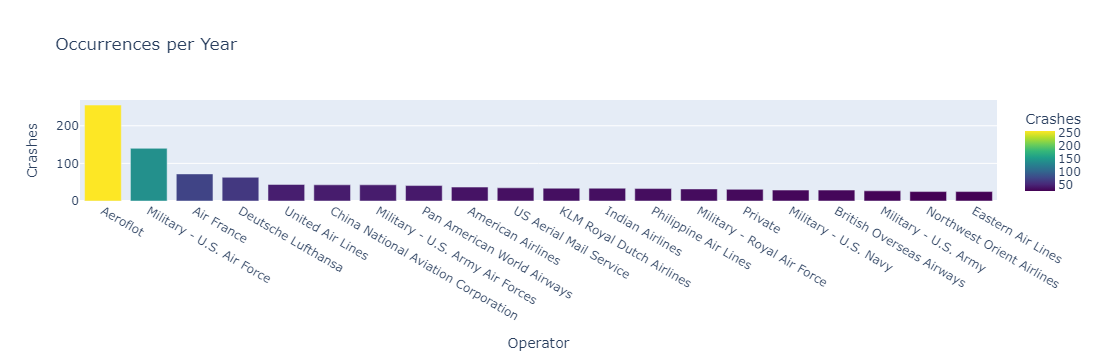

In [72]:
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)
fig = px.bar(top_operators, x='Operator', y='Crashes', color='Crashes', 
             color_continuous_scale='Viridis', 
             labels={'Crashes': 'Crashes', 'Operator': 'Operator'},
             title='Occurrences per Year')
pyo.iplot(fig)
# Display the plot
#fig.show()

In [14]:
year_crashes = data['Year'].value_counts().sort_index().reset_index()
year_crashes.columns = ['Year', 'Count']
year_crashes

,Year,Count
0,1908,1
1,1909,1
2,1912,1
3,1913,3
4,1915,2
...,...,...
108,2019,13
109,2020,8
110,2021,9
111,2022,6


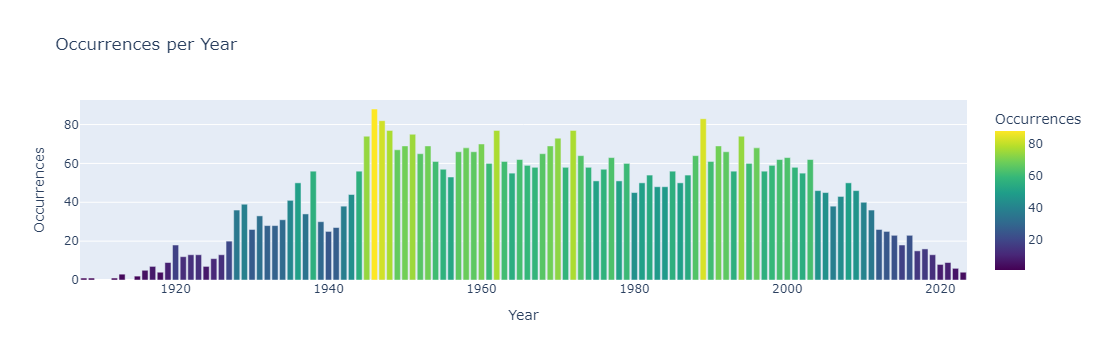

In [74]:

fig = px.bar(year_crashes, x='Year', y='Count', color='Count', 
             color_continuous_scale='Viridis', 
             labels={'Count': 'Occurrences', 'Year': 'Year'},
             title='Occurrences per Year')

# Display the plot
fig.show()

In [16]:
aeroflot_years = data[data['Operator'] == 'Aeroflot']['Year'].value_counts().reset_index()
aeroflot_years.columns = ['Year', 'Crashes']

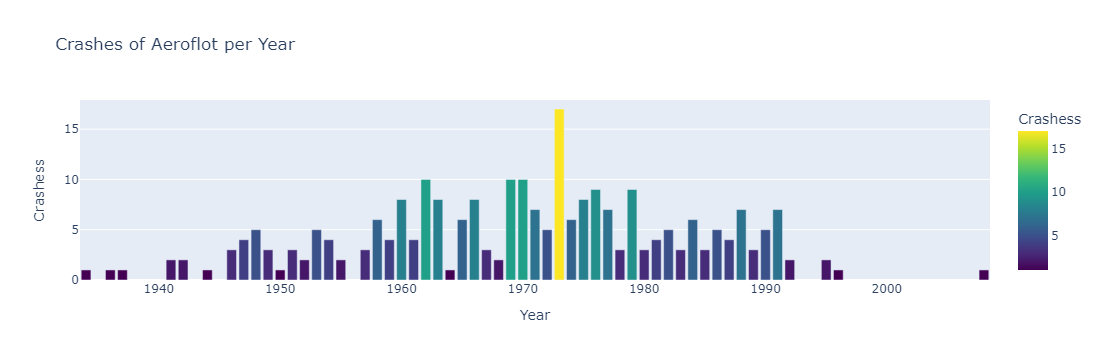

In [76]:
fig = px.bar(aeroflot_years, x='Year', y='Crashes', color='Crashes', 
             color_continuous_scale='Viridis', 
             labels={'Crashes': 'Crashess', 'Year': 'Year'},
             title='Crashes of Aeroflot per Year')

# Display the plot
fig.show()

In [18]:
aeroflot_crashes = data[data['Operator'] == 'Aeroflot']
aeroflot_fatalities = aeroflot_crashes.groupby('Year')['Fatalities'].sum().reset_index()
aeroflot_fatalities.sample()

,Year,Fatalities
6,1946,59


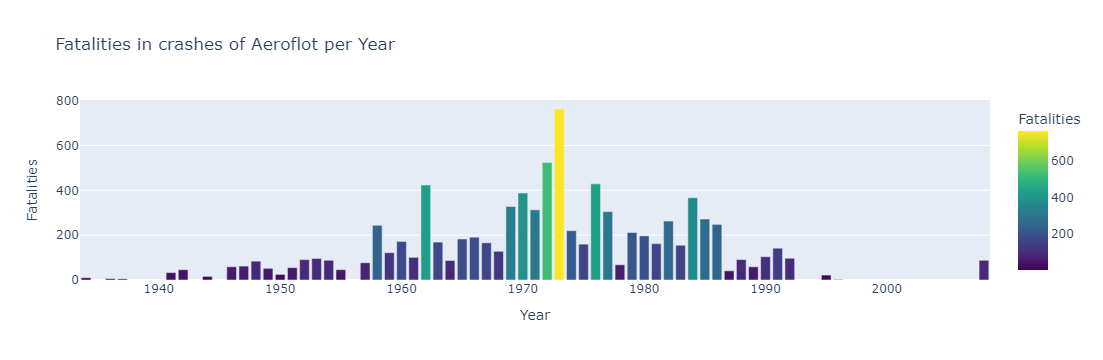

In [78]:
fig = px.bar(aeroflot_fatalities, x='Year', y='Fatalities', color='Fatalities', 
             color_continuous_scale='Viridis', 
             labels={'Fatalities': 'Fatalities', 'Year': 'Year'},
             title='Fatalities in crashes of Aeroflot per Year')

# Display the plot
fig.show()

In [20]:
data.sample(5)

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passengers,Aboard Crew,Fatalities,Fatalities Passengers,Fatalities Crew,Ground,Summary,Year
3966,1995-09-15,12:22,"Tawau, Malaysia",Malaysia Airlines,2133,Kota Kinabalu - Tawau,Fokker 50,9M-MGH,20174,53,49,4,34,32,2,0,"Following a visual approach, the aircraft land...",1995
3850,1993-12-26,20:57,"Gyumri, Armenia",Kuban Airlines,5719,Krasnadar - Gyumri,Antonov AN-26,RA-26141,12903,36,31,5,36,31,5,0,The aircraft stalled and crashed in fog when t...,1993
1074,1948-12-05,NaN,"Kiangwan, China",Central Air Transport,NaN,Chengdu - Shanghai,Curtiss C-46,XT-538,NaN,40,37,3,9,7,2,0,"Overshot runway, crashed and burned.",1948
3129,1981-10-01,15:00,"Casper, Wyoming",Sky Train Air,NaN,"Casper, WY - McAllen, TX",Learjet 24,N44CJ,24-146,3,1,2,3,1,2,0,"A loss of control, possibly initiated by an un...",1981
4041,1996-11-19,17:01,"Quincy, Illinois",United Express / Private,5925,"Burlington, IA - Quincy, IA",Beechcraft 1900-C / Beech King Air A90,N87GL / N1127D,UC-87 /,14,10,4,14,10,4,0,"While landing on Runway 13 at Baldwin Field, t...",1996


In [21]:
fatality_rate = data['Fatalities'].sum()/data['Aboard'].sum() 
survival_rate = 1 - fatality_rate
survival_rate

0.28280975409520637

In [22]:
fatality_rate_aeroflot = data[data['Operator'] == 'Aeroflot']['Fatalities'].sum()/data[data['Operator'] == 'Aeroflot']['Aboard'].sum() 
survival_rate_aeroflot = 1 - fatality_rate_aeroflot
survival_rate_aeroflot

0.21831980232968584

In [23]:
fatality_rate_france = data[data['Operator'] == 'Air France']['Fatalities'].sum()/data[data['Operator'] == 'Air France']['Aboard'].sum() 
survival_rate_france = 1 - fatality_rate_france
survival_rate_france

0.4044067796610169

In [24]:
fatal_surv = data.groupby('Operator').agg({'Fatalities': 'sum', 'Aboard': 'sum'}).reset_index()

# Calculate the survival rate for each operator
fatal_surv['Survival Rate'] = 1 - fatal_surv['Fatalities'] / fatal_surv['Aboard']
fatal_surv= fatal_surv.sort_values(by='Survival Rate', ascending = False)
fatal_surv[fatal_surv['Aboard'] > 100].head(20)

,Operator,Fatalities,Aboard,Survival Rate
1089,LATAM,0,108,1.000000
2122,US Airways,0,155,1.000000
785,Emirates,0,300,1.000000
632,China Airlines,0,165,1.000000
283,Air Transat,0,304,1.000000
1914,Southwest Airlines,1,394,0.997462
837,Fly Jamaica Airways,1,128,0.992188
711,Dagestan Airlines,2,169,0.988166
1618,Pegasus Airlines,3,177,0.983051
2199,Vnukovo Airlines,3,174,0.982759


In [25]:
fatal_surv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2264 entries, 2075 to 843
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Operator       2264 non-null   object 
 1   Fatalities     2264 non-null   int32  
 2   Aboard         2264 non-null   int32  
 3   Survival Rate  2263 non-null   float64
dtypes: float64(1), int32(2), object(1)
memory usage: 70.8+ KB


In [26]:
fatal_surv = fatal_surv.dropna(subset=['Survival Rate'])

In [27]:
fatal_fatal= fatal_surv.sort_values(by='Fatalities', ascending = False)
fatal_fatal.head(20)

,Operator,Fatalities,Aboard,Survival Rate
92,Aeroflot,8858,11332,0.218320
1402,Military - U.S. Air Force,3356,4074,0.176240
200,Air France,1757,2950,0.404407
363,American Airlines,1422,2122,0.329877
1595,Pan American World Airways,1303,3097,0.579270
1412,Military - U.S. Army Air Forces,1070,1100,0.027273
2147,United Air Lines,1019,2461,0.585941
31,AVIANCA,941,1067,0.118088
2110,Turkish Airlines (THY),890,956,0.069038
977,Indian Airlines,860,1451,0.407305


In [28]:
data['Operator'].nunique()

2264

Apply SciPy to analyze the distribution of fatalities and survival rates. Calculate key statistics like mean, median, and standard deviation.

In [30]:
import scipy
import scipy.stats as stats
import numpy as np
mean_scipy = stats.tmean(fatal_surv['Fatalities'])
median_scipy = np.median(fatal_surv['Fatalities'])  # SciPy does not have a separate median function
variance_scipy = stats.tvar(fatal_surv['Fatalities'])
std_dev_scipy = stats.tstd(fatal_surv['Fatalities'])

print(f'Mean: {mean_scipy}, median: {median_scipy}, variance: {variance_scipy}, std: {std_dev_scipy}')

Mean: 49.37428192664604, median: 12.0, variance: 51404.63306065788, std: 226.72589852210947


In [31]:
mean_scipy2 = stats.tmean(fatal_surv['Survival Rate'])
median_scipy2 = np.median(fatal_surv['Survival Rate'])  # SciPy does not have a separate median function
variance_scipy2 = stats.tvar(fatal_surv['Survival Rate'])
std_dev_scipy2 = stats.tstd(fatal_surv['Survival Rate'])
print(f'Mean: {mean_scipy2}, median: {median_scipy2}, variance: {variance_scipy2}, std: {std_dev_scipy2}')

Mean: 0.185375323030829, median: 0.0, variance: 0.08131597618368501, std: 0.2851595626726991


Conduct a hypothesis test (e.g., comparing the average number of fatalities in different decades or regions).

In [33]:
crashes2003_2023=data[data['Year'] > 2003]
crashes1983_2003= data[(data['Year'] > 1983) & (data['Year'] <= 2003)]
crashes2003_2023.info()

<class 'pandas.core.frame.DataFrame'>
Index: 530 entries, 4468 to 4997
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   530 non-null    datetime64[ns]
 1   Time                   486 non-null    object        
 2   Location               530 non-null    object        
 3   Operator               529 non-null    object        
 4   Flight #               176 non-null    object        
 5   Route                  495 non-null    object        
 6   AC Type                529 non-null    object        
 7   Registration           498 non-null    object        
 8   cn/ln                  477 non-null    object        
 9   Aboard                 530 non-null    int32         
 10  Aboard Passengers      530 non-null    int32         
 11  Aboard Crew            530 non-null    int32         
 12  Fatalities             530 non-null    int32         
 13  Fatali

In [34]:
a = crashes2003_2023['Fatalities']
a

4468    148
4469     37
4470      9
4471     43
4472      3
       ... 
4993      8
4994     72
4995     14
4996     12
4997      4
Name: Fatalities, Length: 530, dtype: int32

In [35]:
b = crashes1983_2003['Fatalities']
b

3244     13
3245     38
3246      1
3247     50
3248      1
       ... 
4463     20
4464      2
4465      3
4466      2
4467    140
Name: Fatalities, Length: 1224, dtype: int32

In [36]:
t_statistic, p_value = stats.ttest_ind(a,b)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpretation
alpha = 0.05  # Significance level
if p_value < alpha:
    print("The difference between the groups is statistically significant.")
else:
    print("The difference between the groups is not statistically significant.")

T-statistic: -0.7450523446839842
P-value: 0.4563400083249085
The difference between the groups is not statistically significant.
